In [1]:
# EOS-BPM talk for E300 meeting
import copy
from cycler import cycler;
import matplotlib.pyplot as plt;
import numpy as np;
import scipy;
from scipy.constants import c;
from scipy.signal import find_peaks;
import sys;
import time;
sys.path.insert(0, r'../../python/')

import two_beam as tb;
import phase_retard as pr;

# Colors for plotting.
plot_colors = ['#332288', '#88CCEE', '#44AA99', '#117733', '#999933', \
               '#DDCC77','#CC6677', '#882255',  '#AA4499'];

cy = cycler('color', plot_colors);


# Bunch parameters
Q_drive    = 1.5e-9;
sigz_drive = 5.2e-6;
sigt_drive = sigz_drive/c;
Q_wit      = 0.5e-9;
sigz_wit   = 5.2e-6;
sigt_wit   = sigz_wit/c;
del_z      = 175e-6;
del_t      = del_z/c;
x_drive    = 1.0e-3;
y_drive    = 0.0;
x_wit      = 1.0e-3;
y_wit      = 0.0;
r_drive    = np.sqrt(x_drive**2 + y_drive**2);
r_wit      = np.sqrt(x_wit**2 + y_wit**2);

drive      = {'Q':Q_drive, 'sig_t':sigt_drive, 'x' : x_drive, 'y' : y_drive};
wit        = {'Q':Q_wit, 'sig_t':sigt_wit, 'x' : x_wit, 'y' : y_wit};

# Crystal parameters (type and thickness)
ctype = 'GaP';
d   = 100e-6;
# Probe parameters
y0      = 800e-9;
a_laser = 0 * np.pi / 180;
z_match = 0;
tau     = np.linspace(-200, 800, 5000) * 1e-15;
probe = {'y0'     :y0, 
         'a_laser': a_laser, 
         'z_match': z_match, 
         'chirp'  : True,
         'width'  : 27e-9};

# time array for THz field
N         = 8000;
dt        = drive['sig_t']/10;
t         = np.linspace(- N * dt/2, N * dt/2, N);

# Compuatational parameters
nslice = int(d * 1e6);
base_params  = {'ctype'    : ctype, 
                't'       : t, 
                'tau'     : tau,
                'nslice'  : nslice,
                'beam1'   : drive,
                'beam2'   : wit,
                't_off'   : del_t,
                'plot'    : False,
                'verbose' : False, 
                'pockel'  : True, 
                'ref'     : True,
                'save'    : False,
                'probe'   : probe}; 

# Function for quick plotting 
def makefig():
    fig = plt.figure(figsize = (6,6), dpi = 200);
    ax  = fig.gca();
    ax.set_prop_cycle(cy);
    return fig, ax;

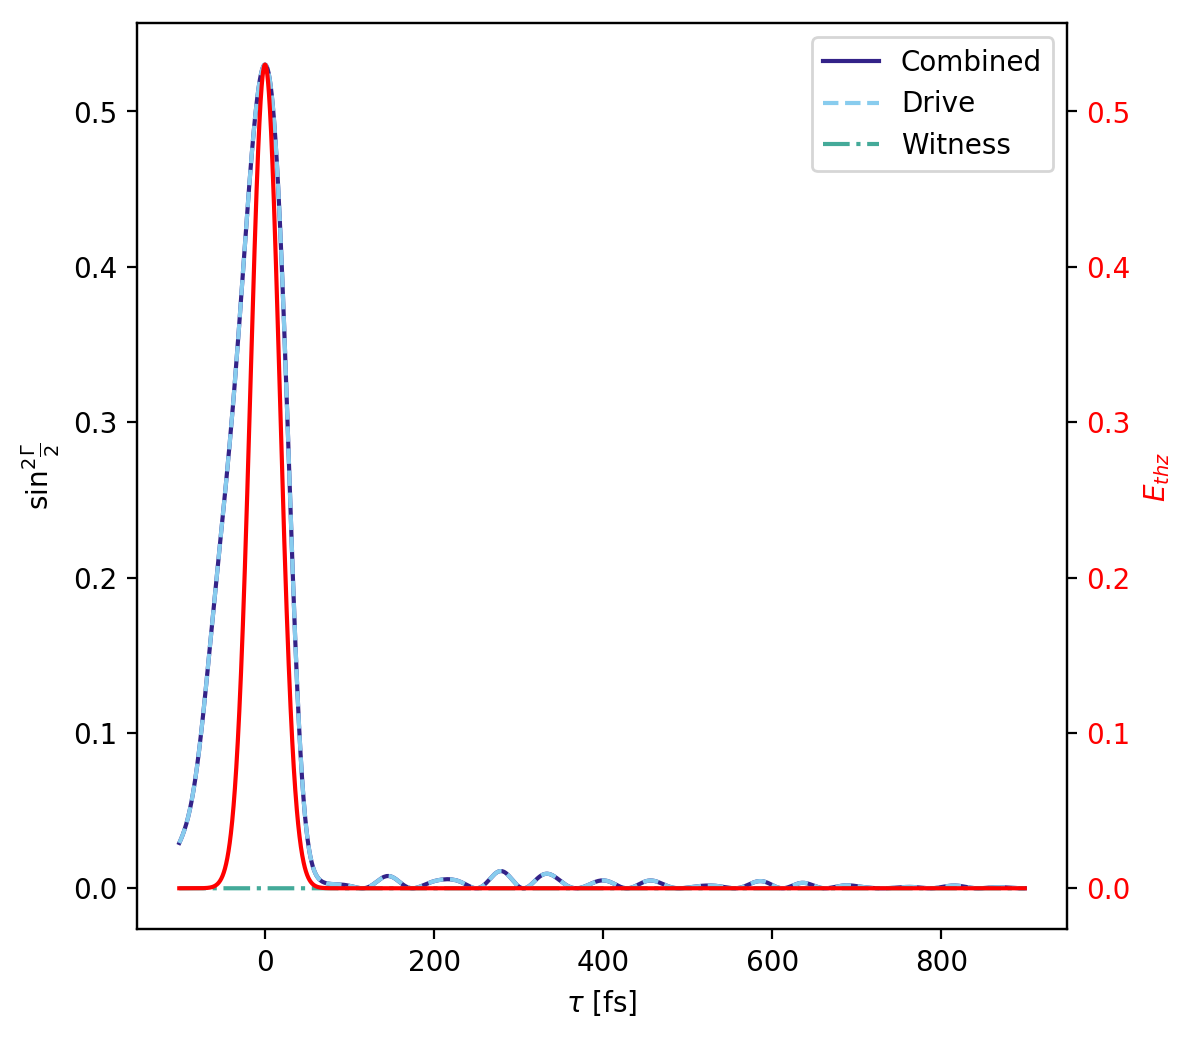

In [6]:
# Plots of signal for delta like pulse and drive/witness like pulse
params = copy.deepcopy(base_params);
params['beam1']['x'] = 3e-3;
#params['beam1']['sig_t'] = 1e-15;
params['beam2']['Q'] = 0.0;
params['plot'] = True;
params['det'] = 'cross';
params['d'] = 100e-6;
gamma_drive, dummy, dummy, tau = pr.phase_retard(params);
Er1, Er2, Er, t1, FEr1, FEr2, FEr, f = tb.thz_field_raw(params);

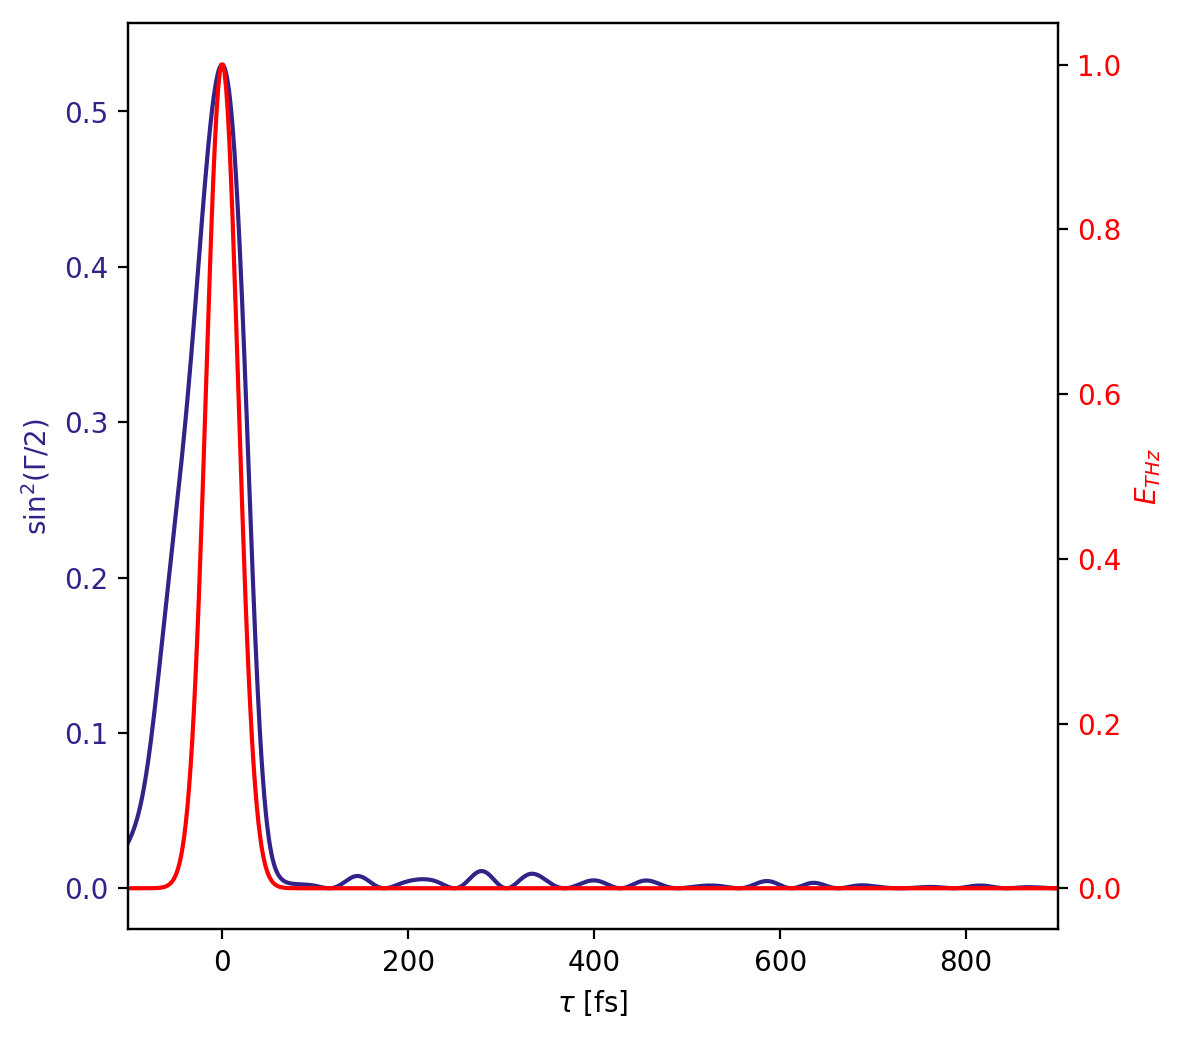

In [7]:
fig, ax = makefig();
ax.plot(tau, np.sin(gamma_drive / 2)**2);
ax2 = ax.twinx();
ax2.plot(t1*1e15, Er1 / max(Er1), '-r');
ax2.set_ylabel(r'$E_{THz}$', color = 'red');
ax2.tick_params(axis = 'y', labelcolor = 'red');
ax.set_xlabel(r'$\tau$ [fs]');
ax.set_ylabel(r'sin$^2(\Gamma / 2)$', color = plot_colors[0]);
ax.tick_params(axis = 'y', labelcolor = plot_colors[0])
ax.set_xlim([min(tau), max(tau)])
plt.show();